#         SYRIATEL CUSTOMER CHURN


## PROJECT OVERVIEW
This project uses machine learning algorithms to predict customers behaviors and also predicts the probability of which customers are more likely to churn(i.e.,leave the service provider). In this project, we will use the Telco Customer Churn dataset inorder to build a predictive model. The dataset contains **3333 records** and has **20 predictors** such as customer service calls, voice mail plans, monthlycharges, etc. The predictors will helps us learn about the customers behaviors that may result in them churning. The target variable is the customer 'churn' which tells whether a customer left the company or is still a customer. 

## BUSINESS UNDERSTANDING
### Business Problem
Telecommunication companies have several business challenges but customer churning is one of the most significant challenge. Mostly its always easier and economical to retain existing customers than acquire new ones. Currently **SyriaTel** is struggling with discountinuation of services by clients for unknown reasons. Mostly, customers churn due to various reasons such as negative customer relations, better offers from other service providers, dissaticfaction with the prices and not seeing value for their money, among other reasons. This could lead to loss of revenue, the company incurring losses due to aggressive marketing and customer acquisition and also the brand image deterioration. SyriaTel wants to develop a model which accurately predicts customers who are most likely to churn, and identify the features that are important for predicting customer churn. Syriatel can thus act to prevent the customer who is likely to churn from actually churning. 

### Business objectives
The main aim of this project is to help SyriaTel in mitigating customer churn by deriving insights from analysis of the data and building a predictive model. The company can retain customers by understanding their behavior and taking decisive steps to reduce identified churn risk. The objectives of this project are as follows:
 - Build a model to predict churn probability based on their usage of services among other parameters.
 - Identify the key causes of churn.
 - Segment high-risk customers.
 - Improve customer retention by coming up with clear business recommendations.

## DATA UNDERSTANDING
For this project,we'll use the **Telco Customer Churn Dataset** which contains information about their customer deatils,services used among other details. It's a CSV(Comma Separated Values) file.

### Data overview
 - **Total Records**: 3333 customers
 - **Total Features**: 20 predictor variables and 1 variable for outcome predition 'Churn'.

## DATA PREPARATION
Before building our machine learning model,we'll begin by preparing our data by cleaning the data and performing some EDA to achieve a certain level of reliability,data quality and structure necessary for the model

### Importing Libraries

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [3]:
#loading the dataset and displaying the first few rows
customer_df = pd.read_csv('Telcocustomer_Churn.csv')
customer_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Displaying the shape and basic info of the dataset
customer_df.shape
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# statistical summary of the dataset
customer_df.describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [6]:
# checking for missing values
customer_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset has no missing values,contains 3333 records and 20 columns that will be our predictors and 1 that is our target variable. It comprises of both numerical and categorical variables.

### Target Variable Analysis
Churn is our target variable for this project,lets have an indepth analysis of it.

In [7]:
# checking distribution of churn
customer_df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [8]:
#checking churn percentage
customer_df['churn'].value_counts(normalize=True)*100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

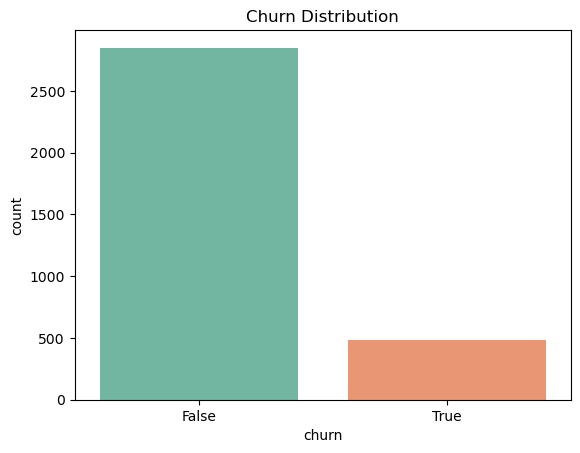

In [9]:
# visualizing the churn distribution
sns.countplot(x='churn', data=customer_df, palette='Set2')
plt.title('Churn Distribution')
plt.show()

From the analysis above,it clearly shows that there is a class imbalance where the number of customers who didn't churn make up the highest percentage(85%) and those who churned makes the left(15%).This could lead to our analysis favouring the majority class which can defeat the purpose of this analysis.

### Categorical predictors vs Churn

In [10]:
cat_predictors = customer_df.select_dtypes(include=['object'])
cat_predictors

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


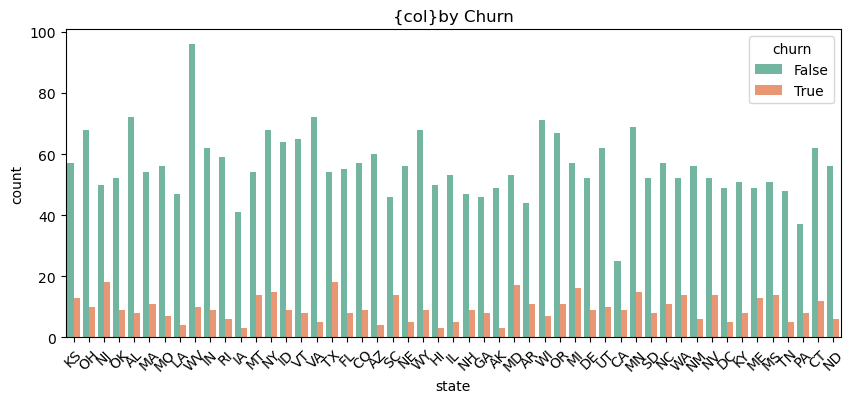

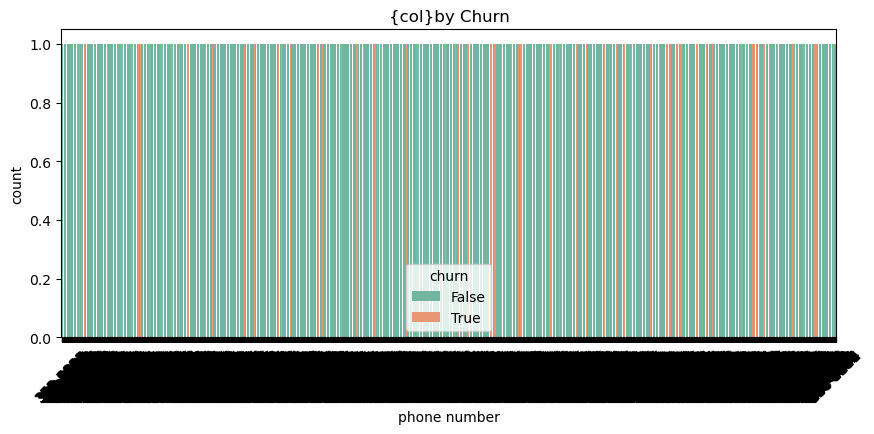

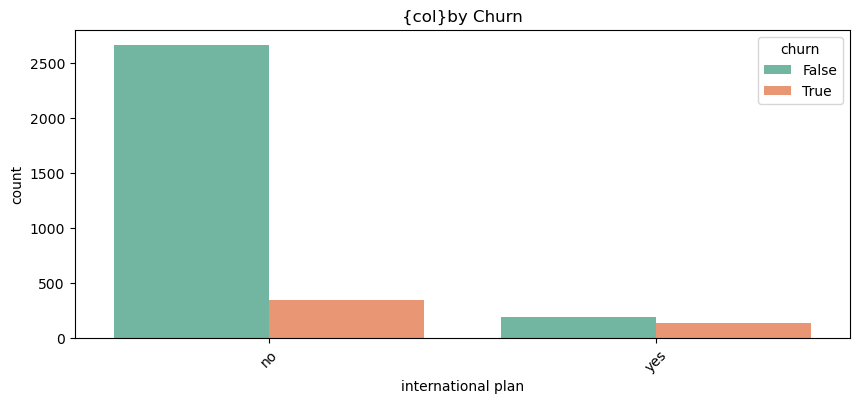

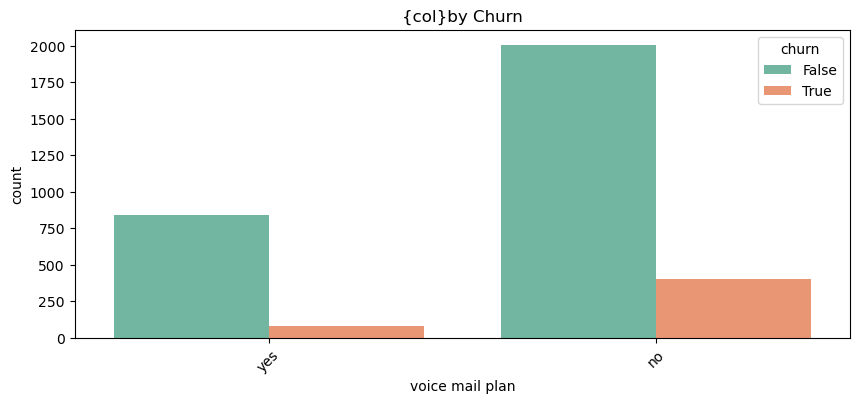

In [11]:
for col in cat_predictors:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, hue='churn', data=customer_df, palette='Set2')
    plt.title('{col}by Churn')
    plt.xticks(rotation=45)
    plt.show()


In [12]:
#encoding churn to be binary
customer_df['churn_encoded'] = customer_df['churn'].apply(lambda x: 1 if x in['yes', True, 'churn'] else 0)
churn_encoded = customer_df['churn_encoded']
churn_encoded.value_counts()
#odd ratio analysis
for col in cat_predictors:
    ct =pd.crosstab(customer_df[col], customer_df['churn_encoded'], normalize='index')
    odds_ratio = (ct[1]/(1-ct[1])).sort_values(ascending=False)
    print(f'\nodds ratio for {col}:')
    print(odds_ratio)



odds ratio for state:
state
NJ    0.360000
CA    0.360000
TX    0.333333
MD    0.320755
SC    0.304348
MI    0.280702
MS    0.274510
NV    0.269231
WA    0.269231
ME    0.265306
MT    0.259259
AR    0.250000
KS    0.228070
NY    0.220588
MN    0.217391
PA    0.216216
MA    0.203704
CT    0.193548
NC    0.192982
NH    0.191489
GA    0.173913
DE    0.173077
OK    0.173077
OR    0.164179
UT    0.161290
CO    0.157895
KY    0.156863
SD    0.153846
OH    0.147059
FL    0.145455
IN    0.145161
ID    0.140625
WY    0.132353
MO    0.125000
VT    0.123077
AL    0.111111
NM    0.107143
ND    0.107143
WV    0.104167
TN    0.104167
DC    0.102041
RI    0.101695
WI    0.098592
IL    0.094340
NE    0.089286
LA    0.085106
IA    0.073171
VA    0.069444
AZ    0.066667
AK    0.061224
HI    0.060000
Name: 1, dtype: float64

odds ratio for phone number:
phone number
342-1004    inf
367-8168    inf
408-5322    inf
387-5860    inf
366-8939    inf
           ... 
360-3126    0.0
360-3525    0.0
360-4320   

From the analysis above of categorical predictors we can make the following observations:
  - Customers with international plans has higher chances of churning as compared to those without, this is our most strongest predictor from our analysis.
  - Customers without a voice plan are more likely to churn  as compared to those without a plan.This can make a good retention factor.

In [13]:
num_columns= customer_df.select_dtypes(include=['int64','float64']).columns
print(num_columns)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn_encoded'],
      dtype='object')


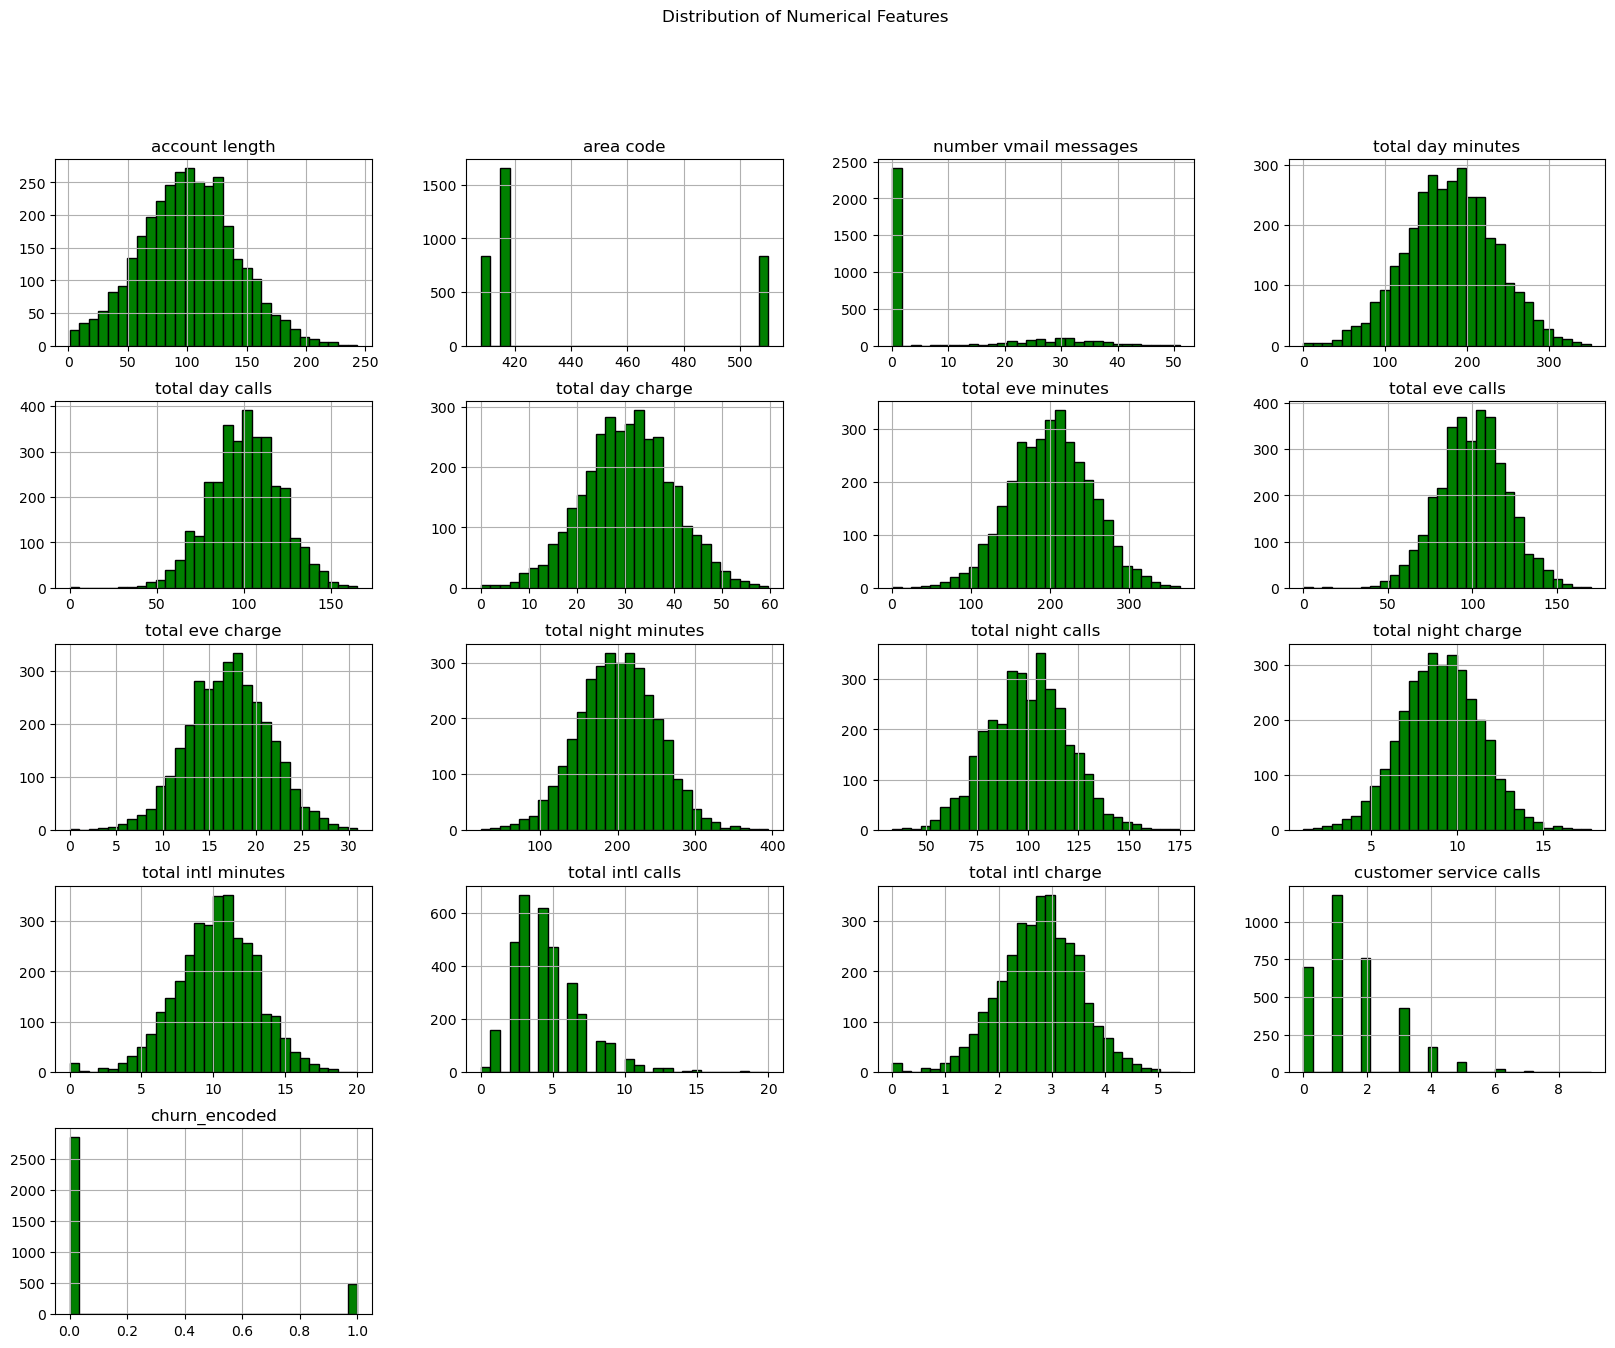

In [14]:
customer_df[num_columns].hist(bins=30,figsize=(20,15),color='green',edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

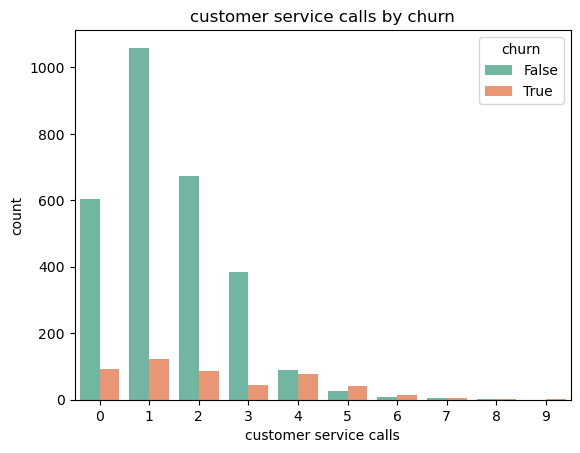

In [15]:
sns.countplot(x='customer service calls', hue='churn', data=customer_df, palette='Set2')
plt.title('customer service calls by churn')
plt.show()

In [16]:
numerical_cols=['customer service calls','total day calls','total day charge','total eve calls','total eve charge','total night calls','total night charge','total intl calls','total intl charge']
numerical_cols

['customer service calls',
 'total day calls',
 'total day charge',
 'total eve calls',
 'total eve charge',
 'total night calls',
 'total night charge',
 'total intl calls',
 'total intl charge']

In [17]:
for col in num_columns:
    group1 = customer_df[customer_df['churn']==True][col]
    group2 = customer_df[customer_df['churn']==False][col]
    t_stat, p= ttest_ind(group1, group2)
    print(f'{col}: t-statistic={t_stat:.2f},p-value={p:.4f}')


account length: t-statistic=0.95,p-value=0.3398
area code: t-statistic=0.36,p-value=0.7216
number vmail messages: t-statistic=-5.20,p-value=0.0000
total day minutes: t-statistic=12.10,p-value=0.0000
total day calls: t-statistic=1.07,p-value=0.2867
total day charge: t-statistic=12.10,p-value=0.0000
total eve minutes: t-statistic=5.38,p-value=0.0000
total eve calls: t-statistic=0.53,p-value=0.5941
total eve charge: t-statistic=5.38,p-value=0.0000
total night minutes: t-statistic=2.05,p-value=0.0405
total night calls: t-statistic=0.35,p-value=0.7230
total night charge: t-statistic=2.05,p-value=0.0405
total intl minutes: t-statistic=3.95,p-value=0.0001
total intl calls: t-statistic=-3.05,p-value=0.0023
total intl charge: t-statistic=3.95,p-value=0.0001
customer service calls: t-statistic=12.32,p-value=0.0000
churn_encoded: t-statistic=inf,p-value=0.0000


In [18]:
corr_matrix = customer_df.corr(numeric_only=True)['churn'].sort_values(ascending=False)
corr_matrix

churn_encoded             1.000000
churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

### Key findings for our Analysis into numerical columns
Most significant finding;
  - Customer service call is the strongest predictor with a p-value of 0.00,t=12.32 and a correlation of (0.209) which is the highest
  - Daytime service usage and metric has a p-value of 0.00,t=12.10 and a correlation of (0.205)
  - Evening service usage and metric has a p-value of 0.00,t=5.38 and a correlation of (0.093)
  - International usage and metric has a p-value of 0.00,t=3.95 and a correlation of (0.068)

Night service usage and metric shows minimum significance in our analysis.



## Data preparation for Machine Learning

### Handling Multicollinerity

In [19]:
# Calculating the correlation matrix
corr_matrix= customer_df.select_dtypes(include=['number']).corr().abs()
# Creating a True/False mask and applying it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# Listing column names of highly correlated features (r > 0.75)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.75)]

customer_df = customer_df.drop(to_drop, axis=1) # Dropping the highly correlated features

### Transforming categorical predictors

In [20]:
# label encoding categorical variables
encoder = LabelEncoder()
customer_df['international plan'] = encoder.fit_transform(customer_df['international plan'])
customer_df['voice mail plan'] = encoder.fit_transform(customer_df['voice mail plan'])


In [21]:
#checking if encoding worked
customer_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,churn_encoded
0,KS,128,415,382-4657,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,0
1,OH,107,415,371-7191,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,0
2,NJ,137,415,358-1921,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,0
3,OH,84,408,375-9999,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,0
4,OK,75,415,330-6626,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,0


### Train test split

In [22]:
# selecting predictors and target variable
X = customer_df.drop(columns=['churn','churn_encoded','phone number','state'])
y = customer_df['churn_encoded']
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)
# scaling numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])


### SMOTE
SMOTE is used to handle class imbalance problems by oversampling the minority class with replacement. Our target variable had a class imbalance and we'll use SMOTE to handle it.

In [23]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train,y_train)
print(pd.Series(y_train_balanced).value_counts())


churn_encoded
0    1993
1    1993
Name: count, dtype: int64


In [24]:
y_test.value_counts()

churn_encoded
0    857
1    143
Name: count, dtype: int64

### Visualizing the target variable

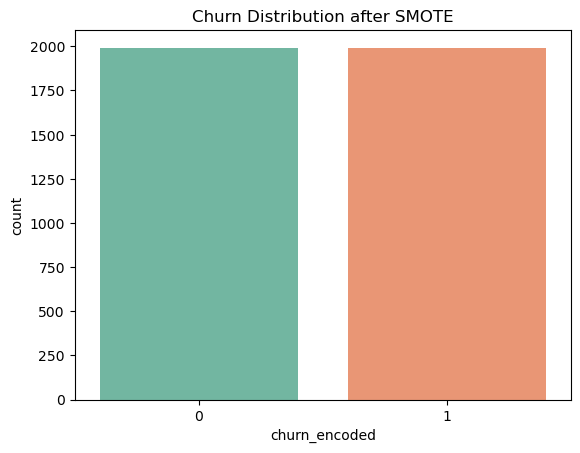

In [25]:
#visualizing churn distribution after smote
sns.countplot(x=y_train_balanced, palette='Set2')
plt.title('Churn Distribution after SMOTE')
plt.show()

The distribution of the churn classes is now balanced. SMOTE was applied on the training sets only. This ensured that an accurate gauge can be made on the model's performance by using a raw test sample that has not been oversampled or undersampled.

## Modelling

### Logistic Regression

Logistic regression model will be used as the baseline model.

In [26]:
model = LogisticRegression(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

In [27]:
coef = pd.Series(model.coef_[0], index=X_train.columns)
coef

account length            0.001285
area code                -0.000536
international plan        1.175870
voice mail plan          -0.318974
number vmail messages    -0.012424
total day calls           0.036600
total day charge          0.671791
total eve calls           0.052348
total eve charge          0.370407
total night calls        -0.019449
total night charge        0.101024
total intl calls         -0.252767
total intl charge         0.400839
customer service calls    0.736894
dtype: float64

Based on our analysis, We can conclude that international plan,customer service calls and daytime usage are the most drivers to churn. For retention of clients,based on the analysis,customers with voicemail plans are more likely to stay followed by those making international calls. The other predictors has negligible impact to churn.

 Test Accuracy: 0.71
Train Accuracy: 0.72

Confusion Matrix:


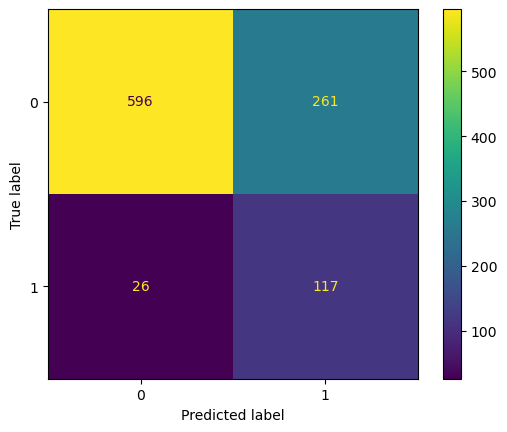


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       857
           1       0.31      0.82      0.45       143

    accuracy                           0.71      1000
   macro avg       0.63      0.76      0.63      1000
weighted avg       0.87      0.71      0.75      1000


 Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1993
           1       0.31      0.76      0.44       340

    accuracy                           0.72      2333
   macro avg       0.63      0.73      0.63      2333
weighted avg       0.85      0.72      0.76      2333



In [28]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
test_acc = accuracy_score(y_test, y_test_pred)
train_acc = accuracy_score(y_train,y_train_pred)
print(f' Test Accuracy: {test_acc:.2f}')
print(f'Train Accuracy: {train_acc:.2f}')
print('\nConfusion Matrix:')
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

print('\n Test Classification Report:')
print(classification_report(y_test, y_test_pred))
print('\n Train Classification Report:')
print(classification_report(y_train,y_train_pred))

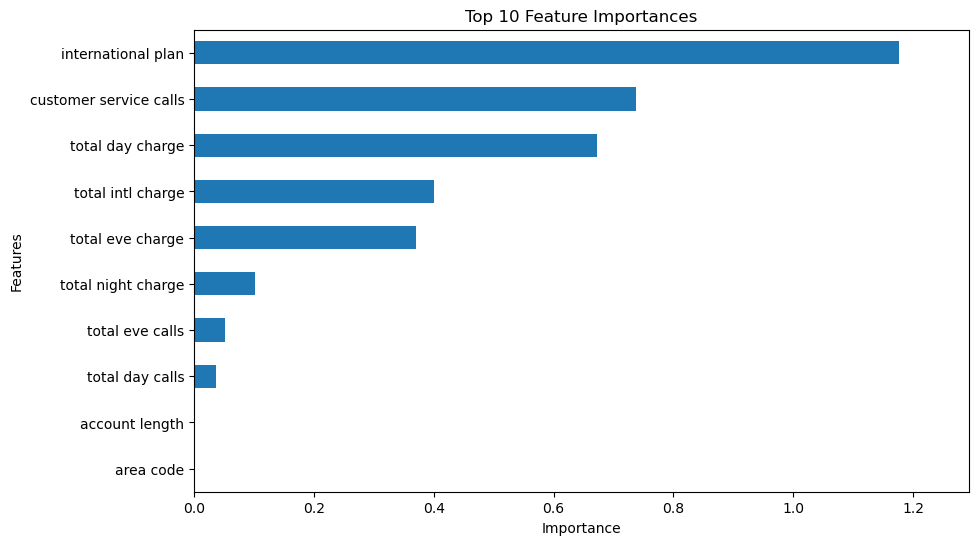

In [29]:
# Visualizing feature importances
importance = model.coef_[0]
feature_names = X_train_balanced.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Selects the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Setting the xlim to the maximum importance value
plt.show()

### Model performance Evaluation
 - Our model performance indicates no overfitting,having a 72% accuracy on training data and 71% accuracy in testing data.  

### Classification report insights
  - It give a high recall percentage of 76% indicating that it was able to predict 76% of churn cases accurately but has many false positives.
  - Has a high precision percentage of 94% and was able to predicting 94% of customers won't churn.

### Decision Tree

In [30]:
#Instantiating DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5,min_samples_split=10,min_samples_leaf=5,criterion='entropy', random_state=42)

In [31]:
# splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced,y_train_balanced,test_size=0.3, random_state=42)


In [32]:
#Fitting on the training data
clf.fit(X_train_balanced,y_train_balanced)

#predicting on the test set and training set
y_pred= clf.predict(X_test)
y_train_p = clf.predict(X_train)

In [33]:
#checking for model accuracy
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_p )
print(f"Decision Tree Accuracy:")
print(f"   • Test Accuracy: {test_accuracy:.1%}")
print(f"    Train Accuracy: {train_accuracy:.1%}")
print(f"   • This means we got {test_accuracy:.1%} of predictions right!")

Decision Tree Accuracy:
   • Test Accuracy: 85.8%
    Train Accuracy: 83.2%
   • This means we got 85.8% of predictions right!


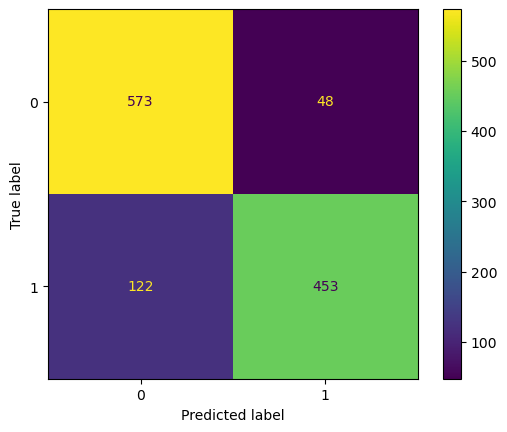

In [34]:
#plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [35]:
print('\n Test Classification Report:')
print(classification_report(y_test,y_pred))
print('\n Train Classification Report:')
print(classification_report(y_train, y_train_p))


 Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       621
           1       0.90      0.79      0.84       575

    accuracy                           0.86      1196
   macro avg       0.86      0.86      0.86      1196
weighted avg       0.86      0.86      0.86      1196


 Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1372
           1       0.90      0.75      0.82      1418

    accuracy                           0.83      2790
   macro avg       0.84      0.83      0.83      2790
weighted avg       0.84      0.83      0.83      2790



### Model perfamance analysis
 - The test accuracy slightly differs from the train accuracy.
 - There is consistency in **Precision** and **Recall** in both cases.
 - This model captures most true positives cases but has some false positives.

## Model Evaluation

In this segment,we'll use **ROC-AUC** to evaluate which customers are risky and **Recall score** to evaluate which customers are likely to churn.

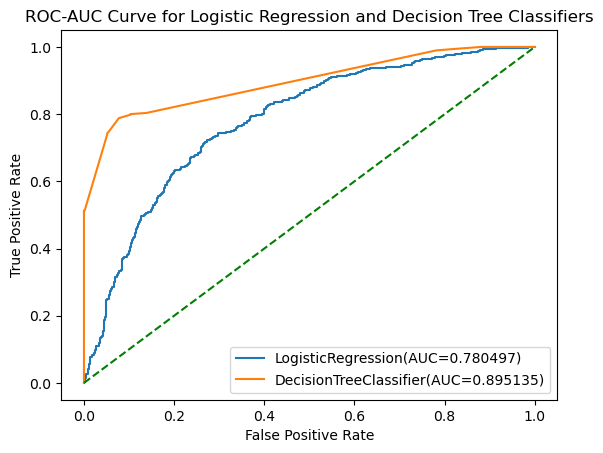

,recall,precision,f1,roc_auc
classifiers,,,,
LogisticRegression,0.725217,0.704392,0.714653,0.780497
DecisionTreeClassifier,0.787826,0.904192,0.842007,0.895135


In [36]:

np.random.seed(42)

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(max_depth=5,min_samples_split=10,min_samples_leaf=5,criterion='entropy',random_state=42)]
#collecting results in a list
results = []

# Training the models and recording the results
for cls in classifiers:
    model = cls.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    #calculating the roc_auc score
    fpr,tpr,_ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr,tpr)
    
    results.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall,
                                        'precision':precision,
                                        'f1':f1,
                                        'roc_auc':roc_auc})
    #initializing the roc-auc curve
    plt.plot(fpr,tpr,label=f"{cls.__class__.__name__}(AUC={roc_auc:2f})")

#creating a result table as a df
result_table = pd.DataFrame(results)
# Setting name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


#plotting the roc-auc curve
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Logistic Regression and Decision Tree Classifiers')
plt.legend(loc='lower right')
plt.show()
# Displaying the results table
result_table

## Models Tuning
Tuning is critical to optimize model performance and avoid issues like underfitting and overfitting.


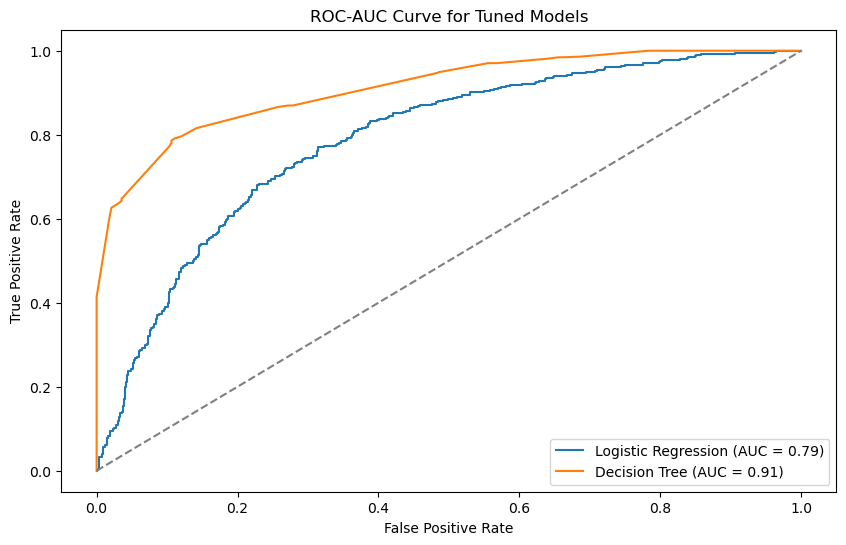

In [39]:
# Defining parameters grids for logistic regression model
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
# Defining parameters for decision tree model
param_grid_tree = {
    'max_depth': [6, 7, 8],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt','log2']
}

# Initializing models
logistic = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Performing Grid Search for Logistic Regression
grid_logistic = GridSearchCV(logistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_logistic.fit(X_train_balanced, y_train_balanced)

# Performing Grid Search for Decision Tree
grid_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='roc_auc', n_jobs=-1)
grid_tree.fit(X_train_balanced, y_train_balanced)

# Getting the best models estimators
best_logistic = grid_logistic.best_estimator_
best_tree = grid_tree.best_estimator_

# Initializing ROC-AUC curves for the both models
plt.figure(figsize=(10, 6))

for model, name in [(best_logistic, "Logistic Regression"), (best_tree, "Decision Tree")]:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plotting the ROC-AUC plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # plotting the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Tuned Models')
plt.legend(loc='lower right')
plt.show()

## Findings
  - From our analysis,modelling and model optimization through hyperparameter tuning, we can conclude that the best model that we'll use to predicting customers who are likely to churn for SyriaTel Telcommunication is the Decision Tree Classifier as it out performs Logistic Regression.
  - It has an AUC of 91% and a recall of 78% which is crucial for identifying actual churners and minimizing false alarms.
  - Churn can lead to high revenue losses,a model with a high recall should be prioritized to ensure flagging of risky customers on time for retention measures to be applied.
  - The model needs improvement and therefore needs continous monitoring of performance metrics.
  - Implement regular model retraining with fresh data.


## Recommendations

Based on the feature analysis,there are different reasons why customers churn and from our analysis,we had some strong correlation between actual churners and some predictors. This will lay the foundation for this recommendations;

1.**International plan monitoring**
   - The company shound conduct and review the call quality,prices and the hidden charges that are associated to the international plan. Since most churners fall in this category,the company can tailor  personalized international bundles or give existing ones at a dicounted price.There should also be transparency in billing.
   - Surveys also should be conducted targetting the international users to get important feedbacks that can be used to curb churning.

2.**Customer Service Experience**
  
  The more a customer calls the service line,they more likely they are to churn. This can indicate dissatisfaction with the services or simply frustration.This can be solved by:
   - Proper training to the customer care assistants to improve response and the speed at which they handle issues as they arise.
   - Track repeat callers and forward their issues to more specialized team for speedy resolution,
   - Introduce self-service options like chatbots or FAQs to resolve issues that are mostly common.

3.**Pricing for Daytime Usage**
  
  High total day charges and daytime minutes charge are one of the key drivers to churn. The following actions should be taken inorder to handle this:
   - Review daytime tariffs.Consider lowering costs for frequent users
   - Offer alerts to customers which inform then when they charges are about to reach a costly limit.
   - Have different plans for users that can suit each of their call habits.

## Next Step

The targeted recall score of 85% is not achieved by the best performing model. There is still some overfitting in the model irregardless of hyperparameter tuning.
The training data size should be increased to reduce overfitting and hence improve model performance